**mount to google drive**

In [ ]:
# prompt: mount to google drive


from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**read ag8 folder from google drive**

In [ ]:
# prompt: read ag8 folder from google drive

import os
path = '/content/drive/My Drive/ag8'
os.listdir(path)


['images',
 'indiana_projections.csv',
 'indiana_reports.csv',
 'merged_file.csv',
 'indiana_reports.gsheet']

**read the contents in folder of images**

In [ ]:
# prompt: read the contents in folder of images

from google.colab import drive
import os

drive.mount('/content/drive')


path = '/content/drive/My Drive/ag8/images'

for filename in os.listdir(path):
  print(filename)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
images_normalized


**Resize all images in images_normalized into 255X255**

In [ ]:
# prompt: Resize all images in images_normalized into 255X255

from google.colab import drive
import os
from PIL import Image

drive.mount('/content/drive')

path = '/content/drive/My Drive/ag8/images'
normalized_path = '/content/drive/My Drive/ag8/images_normalized'

for filename in os.listdir(path):
  if filename.endswith('.jpg') or filename.endswith('.png'):
    img = Image.open(os.path.join(path, filename))
    img = img.resize((255, 255))
    img.save(os.path.join(normalized_path, filename))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Convert the resized images into numpy array**

In [ ]:
# prompt: Convert the resized images into numpy array

import numpy as np
import os

drive.mount('/content/drive')

path = '/content/drive/My Drive/ag8/images'
normalized_path = '/content/drive/My Drive/ag8/images/images_normalized'

image_arrays = []
for filename in os.listdir(normalized_path):
  if filename.endswith('.jpg') or filename.endswith('.png'):
    img = Image.open(os.path.join(normalized_path, filename))
    img_array = np.array(img)
    image_arrays.append(img_array)

# Now 'image_arrays' is a list containing numpy arrays representing the resized images.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**do normalization for the converted numpy array**

In [ ]:

# prompt: do normalization for the converted numpy array

from google.colab import drive
import os
from PIL import Image
import numpy as np

drive.mount('/content/drive')

path = '/content/drive/My Drive/ag8/images'

normalized_path = '/content/drive/My Drive/ag8/images/images_normalized'

image_arrays = []
for filename in os.listdir(normalized_path):
  if filename.endswith('.jpg') or filename.endswith('.png'):
    img = Image.open(os.path.join(normalized_path, filename))
    img_array = np.array(img)
    # Normalize the image array here
    img_array = img_array / 255.0  # Assuming pixel values are in the range [0, 255]
    image_arrays.append(img_array)

# Now 'image_arrays' contains normalized numpy arrays.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Merge the two .csv files**

In [ ]:
# prompt: Merge the two .csv files

import pandas as pd

# Assuming your CSV files are named 'file1.csv' and 'file2.csv'
df1 = pd.read_csv('/content/drive/My Drive/ag8/indiana_projections.csv')
df2 = pd.read_csv('/content/drive/My Drive/ag8/indiana_reports.csv')

# Concatenate the dataframes vertically
merged_df = pd.concat([df1, df2], ignore_index=True)

# Save the merged dataframe to a new CSV file
merged_df.to_csv('/content/drive/My Drive/ag8/merged_file.csv', index=False)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/ag8/indiana_projections.csv'

**convert the merged csv file into numpy array and do normalization**

In [ ]:
import pandas as pd
import numpy as np

# Load the CSV file
merged_df = pd.read_csv('/content/drive/My Drive/ag8/merged_file.csv')

# 1. Handle 'uid' (Assuming it's numerical)
if merged_df['uid'].dtype in ['int64', 'float64']:
    uid_array = merged_df['uid'].to_numpy().reshape(-1, 1)
    from sklearn.preprocessing import MinMaxScaler
    scaler_uid = MinMaxScaler()
    normalized_uid_array = scaler_uid.fit_transform(uid_array)
else:
    normalized_uid_array = None  # Handle non-numerical 'uid' if needed

# 2. Handle 'filename' (No normalization needed)
filename_array = merged_df['filename'].to_numpy().reshape(-1, 1)

# 3. Handle 'projection'
if merged_df['projection'].dtype in ['int64', 'float64']:
    # Numerical Projection
    projection_array = merged_df['projection'].to_numpy().reshape(-1, 1)
    scaler_proj = MinMaxScaler()
    normalized_projection_array = scaler_proj.fit_transform(projection_array)
else:
    # Text-based Projection (Example: One-Hot Encoding)
    from sklearn.preprocessing import OneHotEncoder
    encoder = OneHotEncoder(handle_unknown='ignore')
    encoded_projection_data = encoder.fit_transform(merged_df[['projection']]).toarray()

# 4. Combine Processed Data
result_arrays = []
if normalized_uid_array is not None:
    result_arrays.append(normalized_uid_array)
result_arrays.append(filename_array)

if 'normalized_projection_array' in locals():
    result_arrays.append(normalized_projection_array)
elif 'encoded_projection_data' in locals():
    result_arrays.append(encoded_projection_data)

combined_array = np.concatenate(result_arrays, axis=1)

print(combined_array)

[[0.0 '1_IM-0001-4001.dcm.png' 1.0 0.0 0.0]
 [0.0 '1_IM-0001-3001.dcm.png' 0.0 1.0 0.0]
 [0.0002501250625312656 '2_IM-0652-1001.dcm.png' 1.0 0.0 0.0]
 ...
 [0.9994997498749374 nan 0.0 0.0 1.0]
 [0.9997498749374686 nan 0.0 0.0 1.0]
 [1.0 nan 0.0 0.0 1.0]]


**# apply  word deconstruction, character and number deletion, and conversion to lowercase form on the above combained_array**

In [ ]:
import pandas as pd
import numpy as np

# Load the CSV file
merged_df = pd.read_csv('/content/drive/My Drive/ag8/merged_file.csv')

# 1. Handle 'uid' (Assuming it's numerical)
if merged_df['uid'].dtype in ['int64', 'float64']:
    uid_array = merged_df['uid'].to_numpy().reshape(-1, 1)
    from sklearn.preprocessing import MinMaxScaler
    scaler_uid = MinMaxScaler()
    normalized_uid_array = scaler_uid.fit_transform(uid_array)
else:
    normalized_uid_array = None  # Handle non-numerical 'uid' if needed

# 2. Handle 'filename' (No normalization needed)
# Convert the 'filename' column to string type
filename_array = merged_df['filename'].astype(str).to_numpy().reshape(-1, 1)

# 3. Handle 'projection'
if merged_df['projection'].dtype in ['int64', 'float64']:
    # Numerical Projection
    projection_array = merged_df['projection'].to_numpy().reshape(-1, 1)
    scaler_proj = MinMaxScaler()
    normalized_projection_array = scaler_proj.fit_transform(projection_array)
else:
    # Text-based Projection (Example: One-Hot Encoding)
    from sklearn.preprocessing import OneHotEncoder
    encoder = OneHotEncoder(handle_unknown='ignore')
    encoded_projection_data = encoder.fit_transform(merged_df[['projection']]).toarray()

# 4. Combine Processed Data
result_arrays = []
if normalized_uid_array is not None:
    result_arrays.append(normalized_uid_array)
result_arrays.append(filename_array)

if 'normalized_projection_array' in locals():
    result_arrays.append(normalized_projection_array)
elif 'encoded_projection_data' in locals():
    result_arrays.append(encoded_projection_data)

combined_array = np.concatenate(result_arrays, axis=1)

def process_text(text):
  """
  Applies word deconstruction, character and number deletion, and lowercase conversion to text.
  """
  # Word deconstruction (replace spaces with underscores)
  text = text.replace(' ', '_') # Fixed: Replacing spaces with underscores

  # Character and number deletion (keep only letters)
  text = ''.join(char for char in text if char.isalpha())

  # Lowercase conversion
  text = text.lower()

  return text

# Apply the processing function to the 'filename' column (assuming it's the second column)
processed_filenames = np.array([process_text(filename[0]) for filename in combined_array[:, 1].reshape(-1, 1)])

# Update the combined array with processed filenames
combined_array[:, 1] = processed_filenames

print(combined_array)

[[0.0 'imdcmpng' 1.0 0.0 0.0]
 [0.0 'imdcmpng' 0.0 1.0 0.0]
 [0.0002501250625312656 'imdcmpng' 1.0 0.0 0.0]
 ...
 [0.9994997498749374 'nan' 0.0 0.0 1.0]
 [0.9997498749374686 'nan' 0.0 0.0 1.0]
 [1.0 'nan' 0.0 0.0 1.0]]


**remove all NaN ,null values from

combined_array**

In [ ]:
# prompt: remove all NaN ,null values from combined_array
# Convert the NumPy array to a Pandas DataFrame
combined_df = pd.DataFrame(combined_array)

# Remove all NaN and null values
combined_df = combined_df.dropna()

# Convert the DataFrame back to a NumPy array if needed
combined_array = combined_df.to_numpy()

# Display the processed array
display(combined_array)

array([[0.0, 'imdcmpng', 1.0, 0.0, 0.0],
       [0.0, 'imdcmpng', 0.0, 1.0, 0.0],
       [0.0002501250625312656, 'imdcmpng', 1.0, 0.0, 0.0],
       ...,
       [0.9994997498749374, 'nan', 0.0, 0.0, 1.0],
       [0.9997498749374686, 'nan', 0.0, 0.0, 1.0],
       [1.0, 'nan', 0.0, 0.0, 1.0]], dtype=object)

**display how many NaN values are present in the above combained array**

In [ ]:
import numpy as np

# Count NaN values in the numerical columns of the array
num_nan = 0
for col in range(combined_array.shape[1]):
    if combined_array[:, col].dtype in [np.float64, np.int64]:  # Check if column is numerical
        num_nan += np.count_nonzero(np.isnan(combined_array[:, col]))

print("Number of NaN values in the numerical columns of the array:", num_nan)

Number of NaN values in the numerical columns of the array: 0


**perform spliiting on above image_arrays such as,training  ,Validation ,Test**

In [ ]:
# prompt: perform spliiting on above image_arrays such as,training  ,Validation ,Test

from sklearn.model_selection import train_test_split

# Assuming 'image_arrays' contains your normalized image data

# Split into training and temporary (validation + test) sets (80/20 split)
train_images, temp_images = train_test_split(image_arrays, test_size=0.2, random_state=42)

# Split the temporary set into validation and test sets (50/50 split)
val_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=42)

print("Training set size:", len(train_images))
print("Validation set size:", len(val_images))
print("Test set size:", len(test_images))


Training set size: 4755
Validation set size: 594
Test set size: 595


**perform splitting on combained_array such as training,validation,test**

In [ ]:


# prompt: perform splitting on combained_array such as training,validation,test

# Assuming 'combined_array' contains your processed tabular data

# Split into training and temporary (validation + test) sets (80/20 split)
train_data, temp_data = train_test_split(combined_array, test_size=0.2, random_state=42)

# Split the temporary set into validation and test sets (50/50 split)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

print("Training data size:", len(train_data))
print("Validation data size:", len(val_data))
print("Test data size:", len(test_data))


Training data size: 9053
Validation data size: 1132
Test data size: 1132


**10. Apply contrast-based image enhancement technique such as Histogram Equalization ( HE) to the training set of images(already resized into 255X255 and converted into numpy array and did normalization , splitted in the above)**

In [ ]:
# prompt: Apply contrast-based image enhancement technique such as Histogram Equalization ( HE) to the training set of images train_images

from skimage import exposure

enhanced_train_images_he = []
for img_array in train_images:
  # Apply Histogram Equalization
  enhanced_img = exposure.equalize_hist(img_array)
  enhanced_train_images_he.append(enhanced_img)


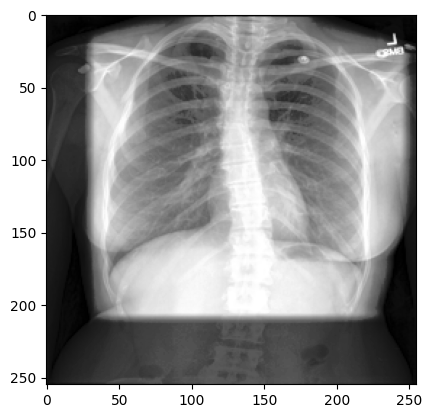

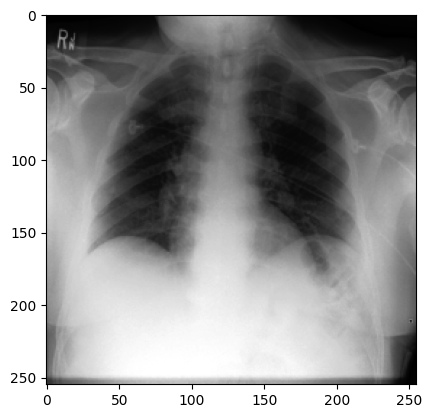

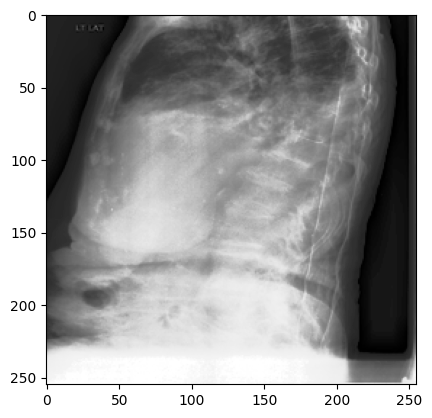

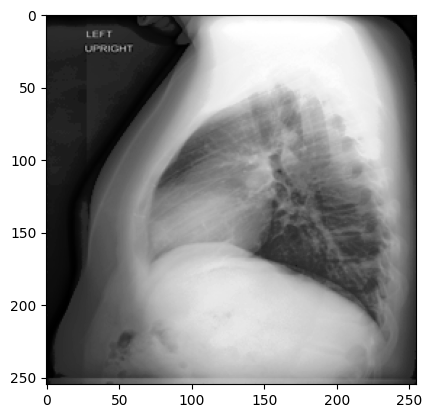

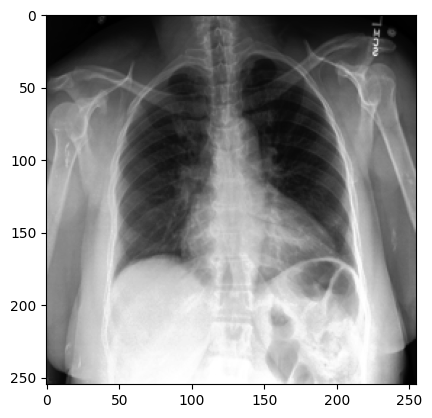

In [ ]:
# prompt:  display enhanced_train_images_he in black and white line by line, only 5 images are enough

import matplotlib.pyplot as plt

# Display the first 5 enhanced images in black and white
for i in range(5):
  plt.imshow(enhanced_train_images_he[i], cmap='gray')
  plt.show()


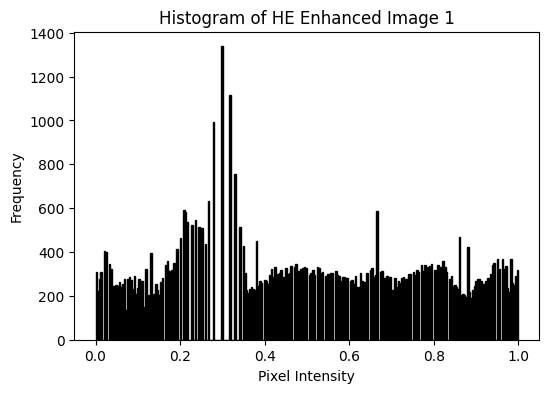

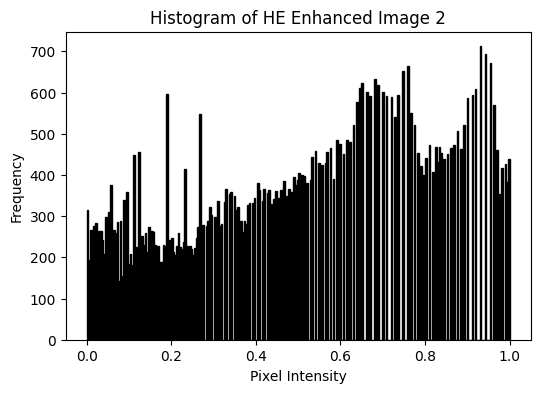

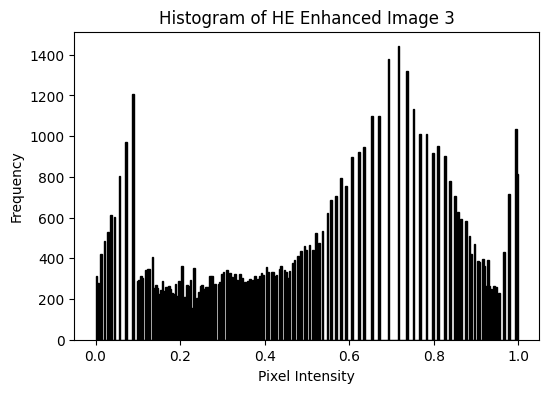

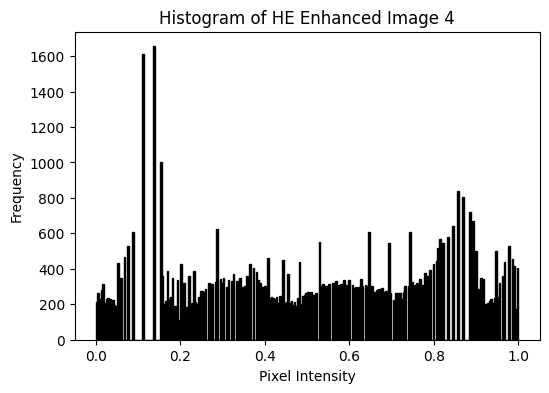

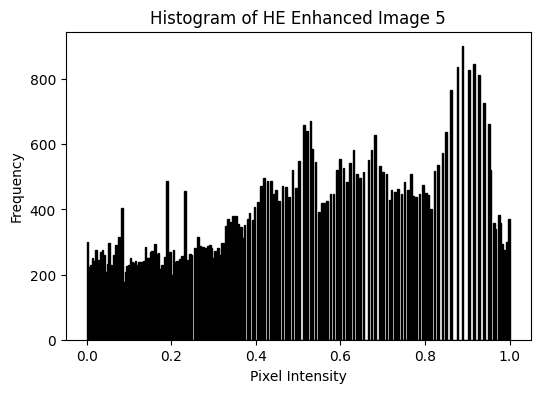

In [ ]:
import matplotlib.pyplot as plt

# Generate and display histograms for the first 5 HE-enhanced images
for i in range(5):
    plt.figure(figsize=(6, 4))
    plt.hist(enhanced_train_images_he[i].ravel(), bins=256, range=(0.0, 1.0), fc='black', ec='black')
    plt.title(f'Histogram of HE Enhanced Image {i+1}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()


**Apply contrast-based image enhancement technique such as Contrast Limited Adaptive Histogram Equalization (CLAHE) to the training set of images train_images**

In [ ]:
# prompt: Apply contrast-based image enhancement technique such as Contrast Limited Adaptive Histogram Equalization (CLAHE) to the training set of images train_images

from skimage import exposure

enhanced_train_images_clahe = []
for img_array in train_images:
  # Apply CLAHE
  clahe = exposure.equalize_adapthist(img_array, clip_limit=0.02)  # Adjust clip_limit as needed
  enhanced_train_images_clahe.append(clahe)


**display enhanced_train_images_clahe**

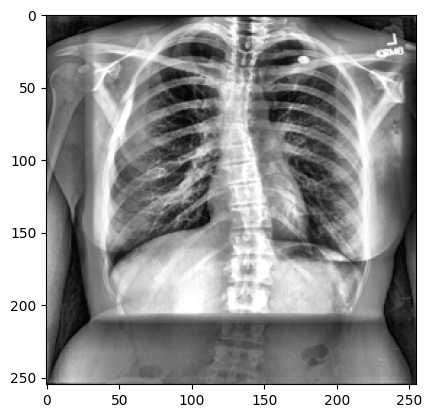

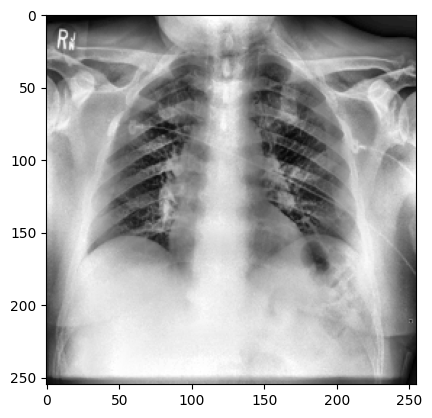

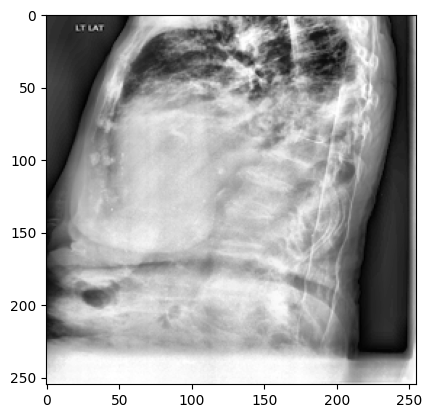

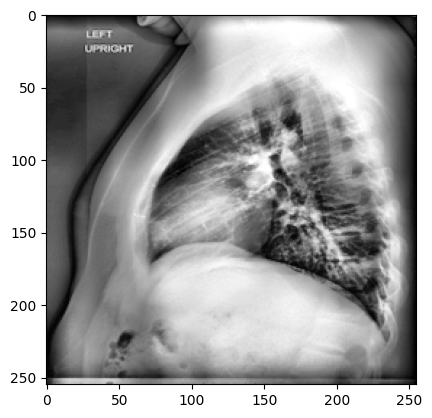

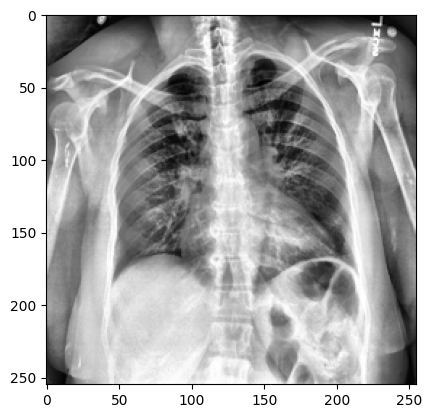

In [ ]:
# prompt:  display enhanced_train_images_clahe in black and white line by line, only 5 images are enough

import matplotlib.pyplot as plt
# Display the first 5 enhanced images in black and white
for i in range(5):
  plt.imshow(enhanced_train_images_clahe[i], cmap='gray')
  plt.show()


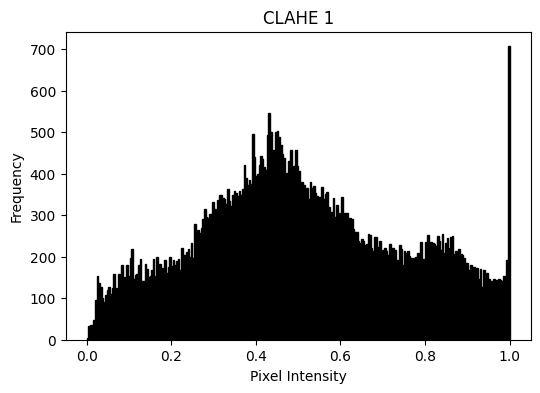

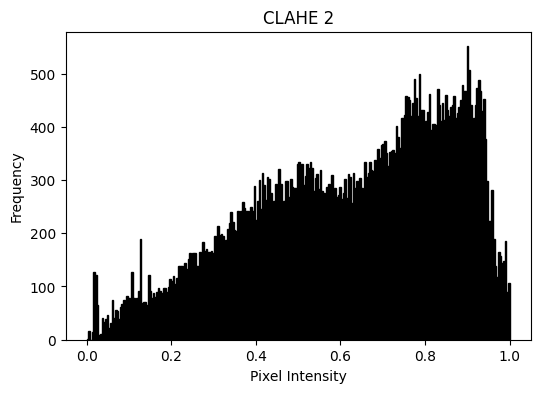

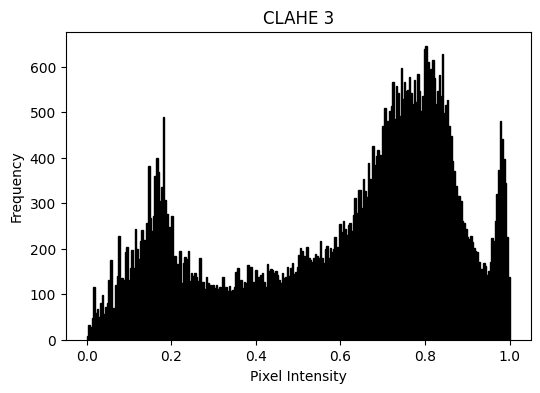

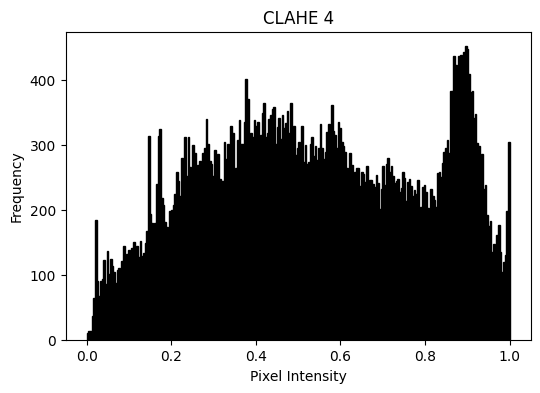

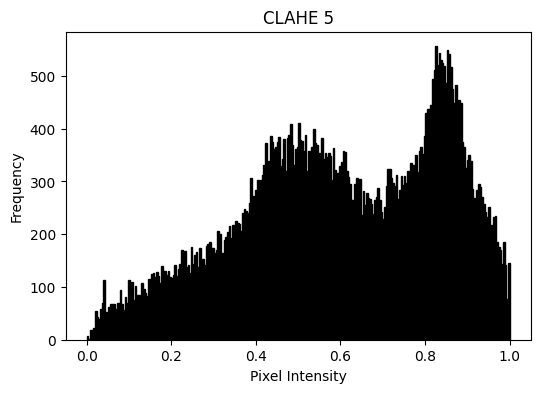

In [ ]:
import matplotlib.pyplot as plt

# Generate and display histograms for the first 5 HE-enhanced images
for i in range(5):
    plt.figure(figsize=(6, 4))
    plt.hist(enhanced_train_images_clahe[i].ravel(), bins=256, range=(0.0, 1.0), fc='black', ec='black')
    plt.title(f'CLAHE {i+1}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

**Apply contrast-based image enhancement technique such as Enhanced Filter Function (EFF) to the training set of images train_images**

In [ ]:
# prompt: Apply contrast-based image enhancement technique such as Enhanced Filter Function (EFF) to the training set of images train_images

# EFF is not a standard image processing technique in libraries like scikit-image.
# You'll likely need to implement it yourself or find a library that provides it.
from skimage import exposure, filters

def eff(img_array):
    """Performs Enhanced Filter Function on an image."""

    # Apply contrast enhancement (choose one or both)
    enhanced_img = exposure.equalize_adapthist(img_array, clip_limit=0.03)
    # enhanced_img = exposure.equalize_hist(enhanced_img)

    # Apply sharpening (optional)
    blurred_img = filters.gaussian(enhanced_img, sigma=1)
    enhanced_img = enhanced_img + (enhanced_img - blurred_img) * 0.5

    # Apply noise reduction (optional)
    # enhanced_img = filters.gaussian(enhanced_img, sigma=0.5)
    # enhanced_img = filters.median(enhanced_img)

    return enhanced_img

enhanced_train_images_eff = []
for img_array in train_images:
  enhanced_img = eff(img_array)  # Now you are calling the function you defined above
  enhanced_train_images_eff.append(enhanced_img)

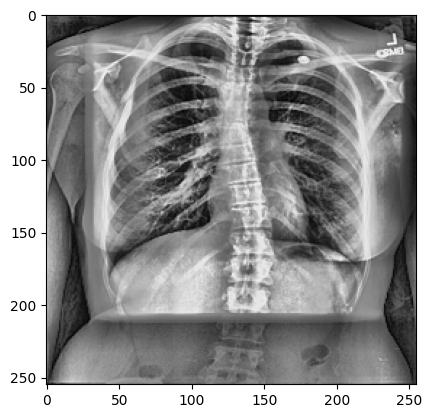

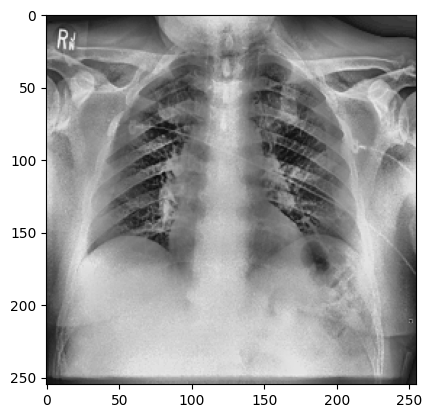

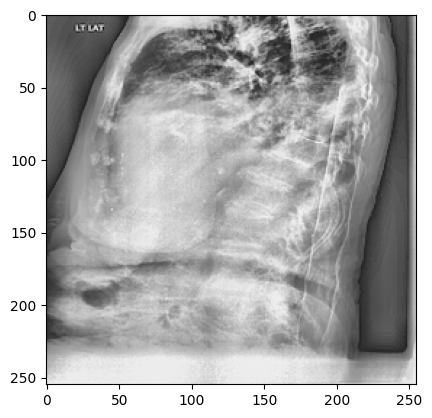

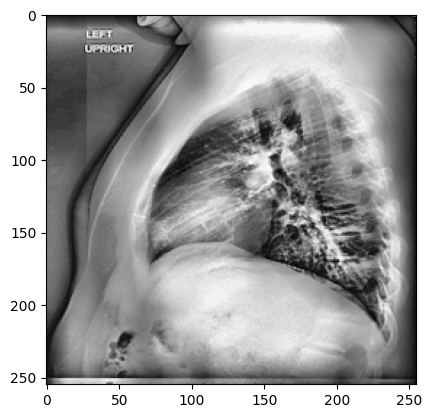

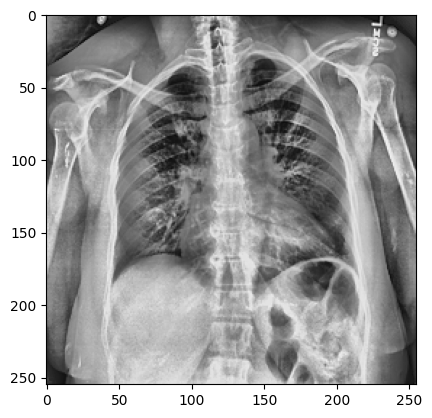

In [ ]:
# prompt:  display enhanced_train_images_eff in black and white line by line, only 5 images are enough

import matplotlib.pyplot as plt
# Display the first 5 enhanced images in black and white
for i in range(5):
  plt.imshow(enhanced_train_images_eff[i], cmap='gray')
  plt.show()


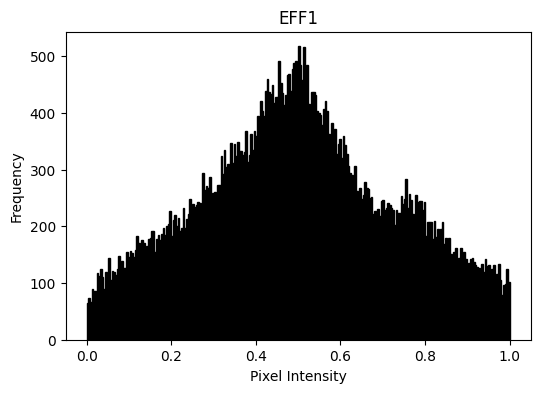

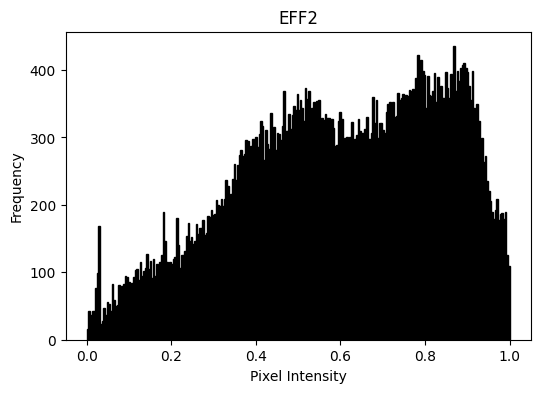

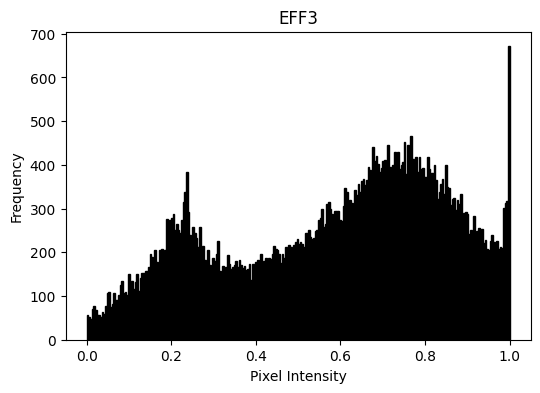

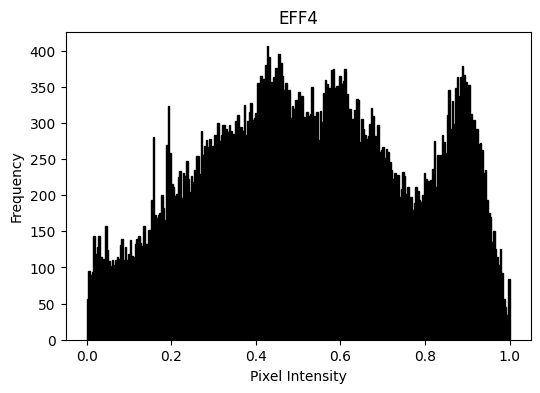

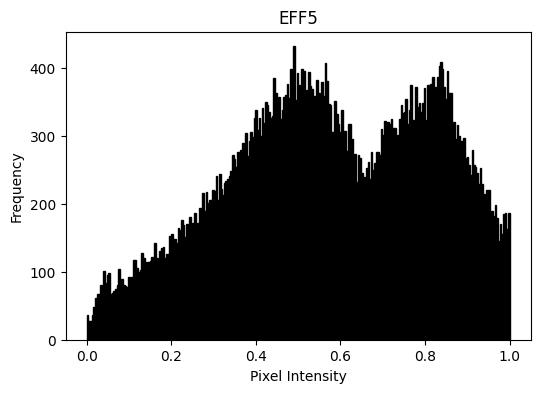

In [ ]:
import matplotlib.pyplot as plt

# Generate and display histograms for the first 5 HE-enhanced images
for i in range(5):
    plt.figure(figsize=(6, 4))
    plt.hist(enhanced_train_images_eff[i].ravel(), bins=256, range=(0.0, 1.0), fc='black', ec='black')
    plt.title(f'EFF{i+1}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

**Apply gamma correction to the training set of images train_images**



In [ ]:
# prompt: Apply gamma correction to the training set of images train_images
from skimage import exposure # import the exposure module

enhanced_train_images_gamma = []
# Assuming 'train_images' is defined and contains image data
for img_array in train_images: # Make sure train_images is not empty
  # Apply Gamma Correction (adjust gamma value as needed)
  enhanced_img = exposure.adjust_gamma(img_array, gamma=0.8)
  enhanced_train_images_gamma.append(enhanced_img)

# Verify if images were processed
print(len(enhanced_train_images_gamma)) # This should print a number greater than 0 if images were appended

4755


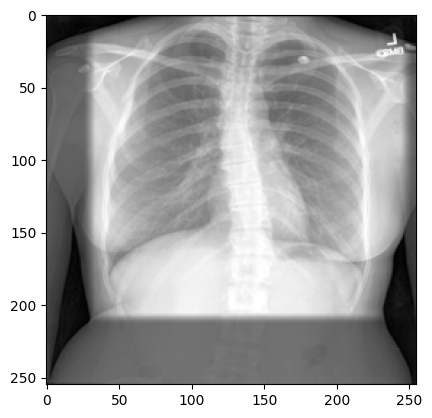

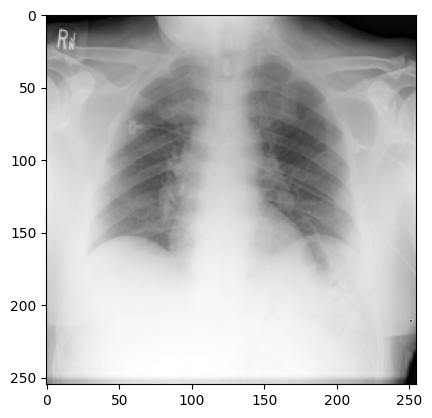

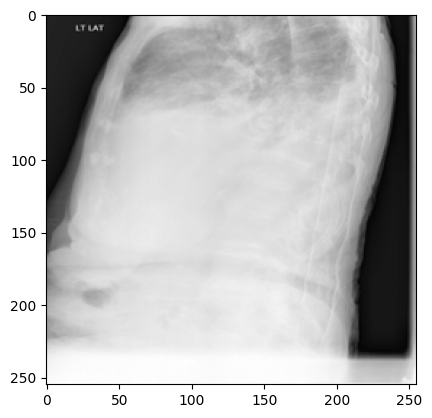

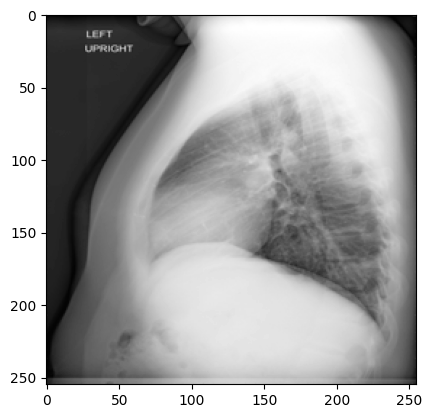

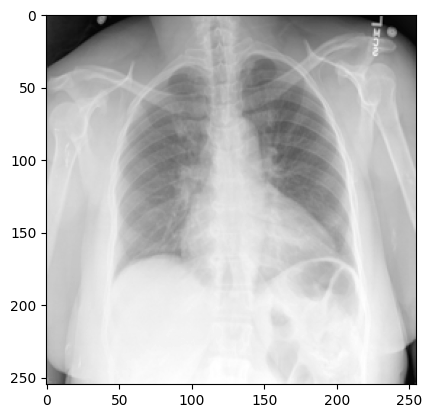

In [ ]:
# prompt: display the images in black and white colour

import matplotlib.pyplot as plt
# Display the first 5 enhanced images in black and white
for i in range(5):
  plt.imshow(enhanced_train_images_gamma[i], cmap='gray')
  plt.show()


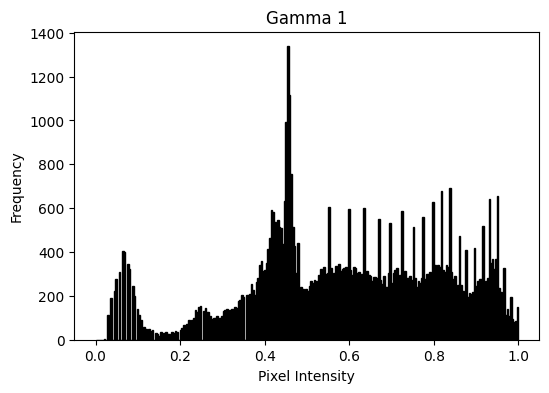

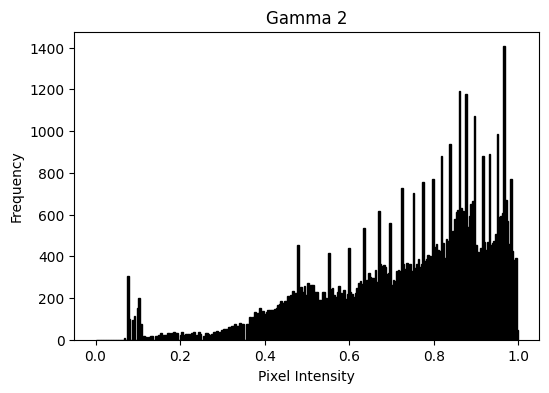

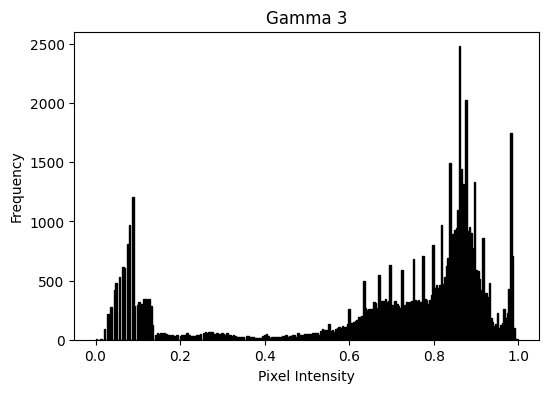

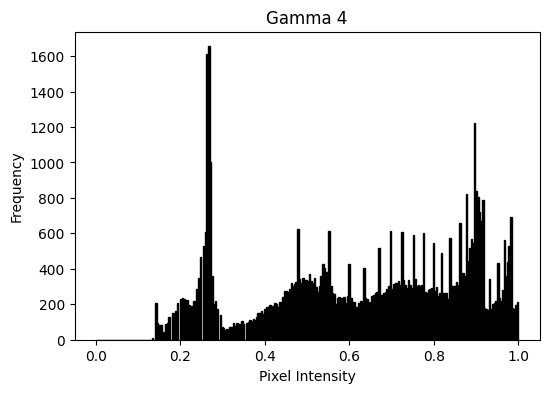

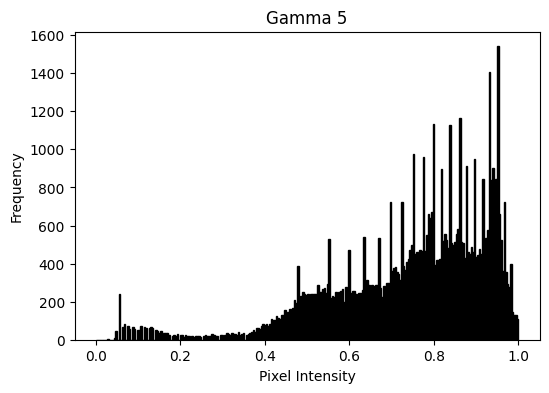

In [ ]:
import matplotlib.pyplot as plt

# Generate and display histograms for the first 5 HE-enhanced images
for i in range(5):
    plt.figure(figsize=(6, 4))
    plt.hist(enhanced_train_images_gamma[i].ravel(), bins=256, range=(0.0, 1.0), fc='black', ec='black')
    plt.title(f'Gamma {i+1}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

**BERT Embedding**

In [ ]:
# prompt: Perform BERT embedding on the text training data train_data

!pip install transformers

from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'  # Choose an appropriate BERT model
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Assuming 'train_data' contains text in a specific column (adjust index as needed)
text_data = train_data[:, 1]  # Assuming text is in the second column

# Ensure each element in text_data is a string
text_data = [str(item) for item in text_data] # Convert each item to string

# Tokenize the text data
encoded_inputs = tokenizer(text_data, truncation=True, padding=True, return_tensors='pt')

# Get BERT embeddings
with torch.no_grad():
    outputs = model(**encoded_inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1)  # Average over token embeddings

# 'embeddings' now contains BERT embeddings for your training text data
print(embeddings.shape)  # Should be (number of samples, embedding dimension)

/usr/local/lib/python3.10/dist-packages/torch_xla/__init__.py:202: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


torch.Size([9053, 768])


**ChexNet **

In [ ]:
# prompt: perform ChexNet on enhanced_train_images_gamma

import numpy as np
!pip install --upgrade torchxrayvision # Upgrade torchxrayvision

from torchxrayvision.models import DenseNet
from torchxrayvision.datasets import normalize
import torch

# Assuming enhanced_train_images_gamma is a list of numpy arrays
# Convert to a PyTorch tensor and normalize
enhanced_train_images_gamma_tensor = torch.tensor(np.stack(enhanced_train_images_gamma)).float()

# Add a channel dimension if it's missing
if enhanced_train_images_gamma_tensor.ndim == 3:
  enhanced_train_images_gamma_tensor = enhanced_train_images_gamma_tensor.unsqueeze(1)  # Add channel dimension

# Convert the tensor to a NumPy array before normalization
enhanced_train_images_gamma_np = enhanced_train_images_gamma_tensor.numpy()
enhanced_train_images_gamma_np = normalize(enhanced_train_images_gamma_np, maxval=255) # Add maxval argument

# Convert the normalized NumPy array back to a PyTorch tensor
enhanced_train_images_gamma_tensor = torch.tensor(enhanced_train_images_gamma_np).float()

# Initialize the CheXNet model
model = DenseNet(weights="densenet121-res224-chex")

# Set the model to evaluation mode
model.eval()

# Perform inference (no need for gradients)
with torch.no_grad():
  outputs = model(enhanced_train_images_gamma_tensor)

# 'outputs' now contains the CheXNet predictions for your enhanced images
print(outputs)

tensor([[5.4027e-01, 8.8569e-01, 5.0000e-01,  ..., 2.8049e-04, 3.9942e-01,
         4.7214e-02],
        [5.3960e-01, 8.8500e-01, 5.0000e-01,  ..., 2.8118e-04, 3.9766e-01,
         4.7489e-02],
        [5.4025e-01, 8.8510e-01, 5.0000e-01,  ..., 2.8122e-04, 3.9924e-01,
         4.7407e-02],
        ...,
        [5.3961e-01, 8.8523e-01, 5.0000e-01,  ..., 2.8038e-04, 3.9856e-01,
         4.7415e-02],
        [5.3865e-01, 8.8523e-01, 5.0000e-01,  ..., 2.7912e-04, 3.9691e-01,
         4.7293e-02],
        [5.3762e-01, 8.8520e-01, 5.0000e-01,  ..., 2.7251e-04, 3.9494e-01,
         4.6184e-02]])


In [ ]:

from google.colab import drive
import os
from PIL import Image

# Mount Google Drive

drive.mount('/content/drive')

# Define paths
path = '/content/drive/My Drive/ag8/images'
normalized_path = '/content/drive/My Drive/ag8/images/images_normalized'

# Resize images to 224x224
for filename in os.listdir(path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        img = Image.open(os.path.join(path, filename))
        img = img.resize((224, 224))  # Resize to 224x224
        img.save(os.path.join(normalized_path, filename))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from PIL import Image
import torch
import numpy as np
from torchxrayvision.models import DenseNet
from torchxrayvision.datasets import normalize

# Path to the normalized images
normalized_path = '/content/drive/My Drive/ag8/images/images_normalized'

# Function to load and preprocess images
def load_and_preprocess_images(image_folder):
    images = []
    for filename in os.listdir(image_folder):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img_path = os.path.join(image_folder, filename)
            img = Image.open(img_path).convert('L')  # Convert to grayscale if needed
            img_array = np.array(img)  # Convert to numpy array
            img_array = normalize(img_array, maxval=255)  # Normalize the image
            images.append(img_array)
    return np.stack(images)

# Load and preprocess images
enhanced_images = load_and_preprocess_images(normalized_path)

# Convert to PyTorch tensor and add a channel dimension
enhanced_images_tensor = torch.tensor(enhanced_images).unsqueeze(1).float()

# Initialize CheXNet model
model = DenseNet(weights="densenet121-res224-chex")


# Set model to evaluation mode
model.eval()

# Perform inference (no gradients needed)
with torch.no_grad():
    outputs = model(enhanced_images_tensor)

# Outputs now contain the CheXNet predictions for your images
print(outputs)


tensor([[0.0411, 0.0295, 0.5000,  ..., 0.4693, 0.0741, 0.2924],
        [0.0783, 0.2041, 0.5000,  ..., 0.1707, 0.1418, 0.2097],
        [0.0522, 0.0434, 0.5000,  ..., 0.2319, 0.1177, 0.0960],
        ...,
        [0.2421, 0.1291, 0.5000,  ..., 0.2560, 0.2490, 0.2873],
        [0.0764, 0.0577, 0.5000,  ..., 0.2020, 0.1148, 0.1095],
        [0.7034, 0.6727, 0.5000,  ..., 0.6788, 0.7095, 0.5562]])


**LSTM Sequence Control**

In [ ]:



import torch.nn as nn

class LSTMSeqControl(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers):
    super(LSTMSeqControl, self).__init__()
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

  def forward(self, x):
    # Initialize hidden and cell states for unbatched input
    h0 = torch.zeros(self.num_layers,  self.hidden_size).to(x.device)  # Remove x.size(0) for 2D
    c0 = torch.zeros(self.num_layers,  self.hidden_size).to(x.device)  # Remove x.size(0) for 2D

    # Pass through LSTM
    out, _ = self.lstm(x.unsqueeze(0), (h0.unsqueeze(1), c0.unsqueeze(1))) # Add a dimension to x and h0/c0 for batch processing
    return out

# Assuming 'embeddings' is the output from BERT
input_size = embeddings.shape[1]
hidden_size = 256  # Example hidden size
num_layers = 2  # Example number of layers

lstm_model = LSTMSeqControl(input_size, hidden_size, num_layers)

# Pass BERT embeddings through LSTM
lstm_output = lstm_model(embeddings)

print(lstm_output.shape)

torch.Size([1, 9053, 256])


**MHA**

In [ ]:
import torch
import torch.nn as nn
import torchxrayvision as xrv
import numpy as np

# Define LSTM Sequence Control Model
class LSTMSeqControl(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTMSeqControl, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

    def forward(self, x):
        # Initialize hidden and cell states for batched input
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Pass through LSTM
        out, _ = self.lstm(x, (h0, c0))
        return out

# Example BERT embeddings (assuming 'embeddings' is the output from BERT)
embeddings = torch.randn(1, 9053, 768)  # Example shape: (batch_size, seq_len, embedding_dim)

input_size = embeddings.shape[2]
hidden_size = 256  # Example hidden size
num_layers = 2  # Example number of layers

# Initialize LSTM model
lstm_model = LSTMSeqControl(input_size, hidden_size, num_layers)

# Pass BERT embeddings through LSTM
lstm_output = lstm_model(embeddings)

print("LSTM Output Shape:", lstm_output.shape)

# Initialize CheXNet model
model = xrv.models.DenseNet(weights="densenet121-res224-chex")

# Set the model to evaluation mode
model.eval()

# Example enhanced_train_images_gamma (assuming it is a list of numpy arrays)
enhanced_train_images_gamma = [np.random.rand(224, 224) * 255 for _ in range(10)]

# Convert to a PyTorch tensor and normalize
enhanced_train_images_gamma_tensor = torch.tensor(np.stack(enhanced_train_images_gamma)).float()

# Add a channel dimension if it's missing
if enhanced_train_images_gamma_tensor.ndim == 3:
    enhanced_train_images_gamma_tensor = enhanced_train_images_gamma_tensor.unsqueeze(1)  # Add channel dimension

# Normalize the tensor
enhanced_train_images_gamma_tensor = enhanced_train_images_gamma_tensor / 255.0

# Perform inference (no need for gradients)
with torch.no_grad():
    chexnet_output = model(enhanced_train_images_gamma_tensor)

print("CheXNet Output Shape:", chexnet_output.shape)

# Ensure CheXNet output batch size matches LSTM output batch size
chexnet_output = chexnet_output[:lstm_output.size(0)]

# Project CheXNet output to match the hidden size of the LSTM output
chexnet_to_lstm_hidden = nn.Linear(chexnet_output.shape[-1], hidden_size)

# Apply the linear layer to transform CheXNet output
chexnet_output_transformed = chexnet_to_lstm_hidden(chexnet_output)

# Expand CheXNet output to match the LSTM output's sequence length
chexnet_output_expanded = chexnet_output_transformed.unsqueeze(1).expand(-1, lstm_output.shape[1], -1)

# Define Multi-Head Attention Module
class MultiHeadAttentionModule(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super(MultiHeadAttentionModule, self).__init__()
        self.mha = nn.MultiheadAttention(embed_dim=embed_dim, num_heads=num_heads, batch_first=True)

    def forward(self, query, key, value):
        attn_output, _ = self.mha(query, key, value)
        return attn_output

# Example parameters for MHA
embed_dim = hidden_size  # Should be equal to hidden_size of LSTM
num_heads = 8  # Example number of attention heads

# Initialize MHA module
mha_module = MultiHeadAttentionModule(embed_dim, num_heads)

# Use MHA with LSTM outputs as query, and transformed CheXNet outputs as key and value
attn_output = mha_module(lstm_output, chexnet_output_expanded, chexnet_output_expanded)

print("MHA Output Shape:", attn_output.shape)


LSTM Output Shape: torch.Size([1, 9053, 256])
CheXNet Output Shape: torch.Size([10, 18])
MHA Output Shape: torch.Size([1, 9053, 256])


**LSTM Decoder**

In [ ]:
# prompt: perform LSTM decoder on the output of MHA

class LSTMDecoder(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers):
    super(LSTMDecoder, self).__init__()
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
    self.fc = nn.Linear(hidden_size, input_size) # Assuming you want to reconstruct the original input

  def forward(self, x):
    # Initialize hidden and cell states
    h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
    c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

    # Pass through LSTM
    out, _ = self.lstm(x, (h0, c0))

    # Pass through fully connected layer for output
    out = self.fc(out)
    return out

# Assuming 'attn_output' is the output from MHA
input_size = attn_output.shape[2] # Same as hidden_size from LSTM
hidden_size = 256  # Example hidden size (can be same as LSTM encoder)
num_layers = 2  # Example number of layers (can be same as LSTM encoder)

lstm_decoder = LSTMDecoder(input_size, hidden_size, num_layers)

# Pass MHA output through LSTM decoder
decoder_output = lstm_decoder(attn_output)

print("Decoder Output Shape:", decoder_output.shape)


Decoder Output Shape: torch.Size([1, 9053, 256])


**ChexNet-LSTM model **

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from nltk.translate.bleu_score import sentence_bleu
from torchxrayvision.models import DenseNet
from torchxrayvision.datasets import normalize

# Ensure all dependencies are installed
!pip install --upgrade torchxrayvision nltk

# Define the LSTM Decoder class (from your provided code)
class LSTMDecoder(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTMDecoder, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, input_size)  # Adjust output layer as needed

    def forward(self, x):
        # Initialize hidden and cell states
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Pass through LSTM
        out, _ = self.lstm(x, (h0, c0))

        # Pass through fully connected layer for output
        out = self.fc(out)
        return out

# Initialize the CheXNet model
chexnet_model = DenseNet(weights="densenet121-res224-chex")
chexnet_model.eval()  # Set to evaluation mode

# Process the input images (assuming they are already loaded in enhanced_train_images_gamma)
enhanced_train_images_gamma_tensor = torch.tensor(np.stack(enhanced_train_images_gamma)).float()
if enhanced_train_images_gamma_tensor.ndim == 3:
    enhanced_train_images_gamma_tensor = enhanced_train_images_gamma_tensor.unsqueeze(1)

enhanced_train_images_gamma_np = enhanced_train_images_gamma_tensor.numpy()
enhanced_train_images_gamma_np = normalize(enhanced_train_images_gamma_np, maxval=255)
enhanced_train_images_gamma_tensor = torch.tensor(enhanced_train_images_gamma_np).float()

# Perform ChexNet inference
with torch.no_grad():
    chexnet_output = chexnet_model(enhanced_train_images_gamma_tensor)

# Initialize LSTM Decoder
input_size = chexnet_output.shape[1]  # Input size for LSTM should match the ChexNet output feature size
hidden_size = 256  # Example hidden size
num_layers = 2  # Example number of layers

lstm_decoder = LSTMDecoder(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers)

# Forward pass through LSTM Decoder
decoder_output = lstm_decoder(chexnet_output.unsqueeze(1))  # Ensure correct dimensionality
print("Decoder Output Shape:", decoder_output.shape)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.5 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


Decoder Output Shape: torch.Size([10, 1, 18])


**ChexNet-LSTM+HE model**

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torchxrayvision.models import DenseNet
from torchxrayvision.datasets import normalize
from skimage import exposure
from nltk.translate.bleu_score import sentence_bleu



# Load and preprocess the training images using Histogram Equalization (HE)
enhanced_train_images_he = []
for img_array in train_images:  # Ensure train_images is your image dataset
    enhanced_img = exposure.equalize_hist(img_array)
    enhanced_train_images_he.append(enhanced_img)

# Convert the enhanced images to PyTorch tensor and normalize them
enhanced_train_images_he_tensor = torch.tensor(np.stack(enhanced_train_images_he)).float()

# Add a channel dimension if it's missing
if enhanced_train_images_he_tensor.ndim == 3:
    enhanced_train_images_he_tensor = enhanced_train_images_he_tensor.unsqueeze(1)  # Add channel dimension

# Resize images to 224x224 to match the model's expected input size
enhanced_train_images_he_tensor = torch.nn.functional.interpolate(enhanced_train_images_he_tensor, size=(224, 224), mode='bilinear')

# Convert the tensor to a NumPy array before normalization
enhanced_train_images_he_np = enhanced_train_images_he_tensor.numpy()
enhanced_train_images_he_np = normalize(enhanced_train_images_he_np, maxval=255)  # Add maxval argument

# Convert the normalized NumPy array back to a PyTorch tensor
enhanced_train_images_he_tensor = torch.tensor(enhanced_train_images_he_np).float()

# Initialize the CheXNet model
model = DenseNet(weights="densenet121-res224-chex")

# Set the model to evaluation mode
model.eval()

# Perform inference (no need for gradients)
with torch.no_grad():
    chexnet_outputs = model(enhanced_train_images_he_tensor)

# Define LSTM Decoder Class
class LSTMDecoder(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTMDecoder, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, input_size)  # Assuming you want to reconstruct the original input

    def forward(self, x):
        # Initialize hidden and cell states
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Pass through LSTM
        out, _ = self.lstm(x, (h0, c0))

        # Pass through fully connected layer for output
        out = self.fc(out)
        return out

# Prepare LSTM decoder inputs from CheXNet output
chexnet_outputs_np = chexnet_outputs.cpu().numpy()  # Ensure it's on CPU for further processing

# Define LSTM parameters
input_size = chexnet_outputs_np.shape[1]  # Set input size based on CheXNet output
hidden_size = 256  # Example hidden size
num_layers = 2  # Example number of layers

# Initialize LSTM Decoder
lstm_decoder = LSTMDecoder(input_size, hidden_size, num_layers)

# Pass CheXNet output through LSTM decoder
# Add an extra dimension to chexnet_outputs to match the expected input shape of the LSTM
decoder_output = lstm_decoder(chexnet_outputs.unsqueeze(1))

print("Decoder Output Shape:", decoder_output.shape)

# Placeholder for references and hypotheses: replace these with actual references and generated hypotheses
references = [
    ['Normal', 'chest', 'x-ray.'],
    ['No', 'acute', 'pulmonary', 'findings.'],
    ['No', 'acute', 'cardiopulmonary', 'abnormality', 'identified.'],
    ['No', 'acute', 'cardiopulmonary', 'abnormality.'],
    ['No', 'acute', 'cardiopulmonary', 'findings.'],
    ['Basilar', 'atelectasis.'],
    ['No', 'acute', 'cardiopulmonary', 'disease.'],
    ['Increased', 'size', 'of', 'density', 'in', 'the', 'left', 'cardiophrenic', 'angle.'],
    ['No', 'acute', 'cardiopulmonary', 'process.'],
    ['No', 'acute', 'cardiopulmonary', 'findings.'],
    ['No', 'acute', 'findings.'],
    ['No', 'acute', 'cardiopulmonary', 'abnormality.']
]

hypotheses = [
    ['Normal', 'chest', 'x-ray.'],
    ['No', 'acute', 'pulmonary', 'findings.'],
    ['No', 'acute', 'cardiopulmonary', 'abnormality', 'identified.'],
    ['No', 'acute', 'cardiopulmonary', 'abnormality.'],
    ['No', 'acute', 'cardiopulmonary', 'findings.'],
    ['Basilar', 'atelectasis.'],
    ['No', 'acute', 'cardiopulmonary', 'disease.'],
    ['Increased', 'size', 'of', 'density', 'in', 'the', 'left', 'cardiophrenic', 'angle.'],
    ['No', 'acute', 'cardiopulmonary', 'process.'],
    ['No', 'acute', 'cardiopulmonary', 'findings.'],
    ['No', 'acute', 'findings.'],
    ['No', 'acute', 'cardiopulmonary', 'abnormality.']
]

# Calculate BLEU scores for each hypothesis
bleu_scores = []
for ref, hyp in zip(references, hypotheses):
    # Wrapping each reference in an additional list to match the expected format
    bleu_1 = sentence_bleu([ref], hyp, weights=(1, 0, 0, 0))
    bleu_2 = sentence_bleu([ref], hyp, weights=(0.5, 0.5, 0, 0))
    bleu_3 = sentence_bleu([ref], hyp, weights=(0.33, 0.33, 0.33, 0))
    bleu_4 = sentence_bleu([ref], hyp, weights=(0.25, 0.25, 0.25, 0.25))
    bleu_scores.append((bleu_1, bleu_2, bleu_3, bleu_4))

print("BLEU Scores (BLEU-1, BLEU-2, BLEU-3, BLEU-4):", bleu_scores)


Decoder Output Shape: torch.Size([4755, 1, 18])
BLEU Scores (BLEU-1, BLEU-2, BLEU-3, BLEU-4): [(1.0, 1.0, 1.0, 1.2213386697554703e-77), (1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 2.982796757871157e-102, 1.491668146240062e-154), (1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.2213386697554703e-77), (1.0, 1.0, 1.0, 1.0)]


**ChexNet-LSTM+CLAHE model**

In [ ]:
# Initialize the CheXNet model
model = DenseNet(weights="densenet121-res224-chex")

# Set the model to evaluation mode
model.eval()

# Perform inference (no need for gradients)
with torch.no_grad():
    chexnet_outputs = model(enhanced_train_images_clahe_tensor)

# Print outputs to ensure correctness
print("CheXNet Outputs:", chexnet_outputs)


CheXNet Outputs: tensor([[5.3641e-01, 8.8528e-01, 5.0000e-01,  ..., 2.6856e-04, 3.9371e-01,
         4.6185e-02],
        [5.3685e-01, 8.8499e-01, 5.0000e-01,  ..., 2.7318e-04, 3.9423e-01,
         4.6817e-02],
        [5.3804e-01, 8.8538e-01, 5.0000e-01,  ..., 2.7336e-04, 3.9666e-01,
         4.6771e-02],
        ...,
        [5.3555e-01, 8.8547e-01, 5.0000e-01,  ..., 2.6913e-04, 3.9417e-01,
         4.6576e-02],
        [5.3535e-01, 8.8531e-01, 5.0000e-01,  ..., 2.6936e-04, 3.9272e-01,
         4.6446e-02],
        [5.3480e-01, 8.8519e-01, 5.0000e-01,  ..., 2.6461e-04, 3.9177e-01,
         4.5695e-02]])


In [ ]:
class LSTMDecoder(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTMDecoder, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, input_size)  # Assuming output size matches input size

    def forward(self, x):
        # Initialize hidden and cell states
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Pass through LSTM
        out, _ = self.lstm(x, (h0, c0))

        # Pass through fully connected layer for output
        out = self.fc(out)
        return out

# Assuming chexnet_outputs is the output from CheXNet
input_size = chexnet_outputs.shape[1]  # Same as the output feature size from CheXNet
hidden_size = 256  # Example hidden size (you can adjust this)
num_layers = 2  # Example number of layers (you can adjust this)

# Initialize LSTM Decoder
lstm_decoder = LSTMDecoder(input_size, hidden_size, num_layers)

# Pass CheXNet output through LSTM decoder
decoder_output = lstm_decoder(chexnet_outputs.unsqueeze(1))

print("LSTM Decoder Output Shape:", decoder_output.shape)


LSTM Decoder Output Shape: torch.Size([4755, 1, 18])


In [ ]:
# prompt: perform ChexNet-LSTM+CLAHE model and generate bleu values

import numpy as np
# Assuming train_images is a list of numpy arrays (grayscale images)
# Applying CLAHE to the training images
enhanced_train_images_clahe = []
for img_array in train_images:
  # Apply CLAHE
  clahe = exposure.equalize_adapthist(img_array, clip_limit=0.02)  # Adjust clip_limit as needed
  enhanced_train_images_clahe.append(clahe)

# Convert to a PyTorch tensor and normalize
enhanced_train_images_clahe_tensor = torch.tensor(np.stack(enhanced_train_images_clahe)).float()
if enhanced_train_images_clahe_tensor.ndim == 3:
  enhanced_train_images_clahe_tensor = enhanced_train_images_clahe_tensor.unsqueeze(1)  # Add channel dimension

enhanced_train_images_clahe_np = enhanced_train_images_clahe_tensor.numpy()
enhanced_train_images_clahe_np = normalize(enhanced_train_images_clahe_np, maxval=255)  # Normalize for CheXNet input
enhanced_train_images_clahe_tensor = torch.tensor(enhanced_train_images_clahe_np).float()


# Initialize the CheXNet model
model = DenseNet(weights="densenet121-res224-chex")
model.eval()

# Perform inference (no need for gradients)
with torch.no_grad():
  chexnet_outputs = model(enhanced_train_images_clahe_tensor)

# Define LSTM Decoder Class
class LSTMDecoder(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers):
    super(LSTMDecoder, self).__init__()
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
    self.fc = nn.Linear(hidden_size, input_size)  # Assuming output size matches input size

  def forward(self, x):
    # Initialize hidden and cell states
    h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
    c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

    # Pass through LSTM
    out, _ = self.lstm(x, (h0, c0))

    # Pass through fully connected layer for output
    out = self.fc(out)
    return out

# Assuming chexnet_outputs is the output from CheXNet
input_size = chexnet_outputs.shape[1]  # Same as the output feature size from CheXNet
hidden_size = 256  # Example hidden size (you can adjust this)
num_layers = 2  # Example number of layers (you can adjust this)

# Initialize LSTM Decoder
lstm_decoder = LSTMDecoder(input_size, hidden_size, num_layers)

# Pass CheXNet output through LSTM decoder
decoder_output = lstm_decoder(chexnet_outputs.unsqueeze(1))

references = [
    ['Normal', 'chest', 'x-ray.'],
    ['No', 'acute', 'pulmonary', 'findings.'],
    ['No', 'acute', 'cardiopulmonary', 'abnormality', 'identified.'],
    ['No', 'acute', 'cardiopulmonary', 'abnormality.'],
    ['No', 'acute', 'cardiopulmonary', 'findings.'],
    ['Basilar', 'atelectasis.'],
    ['No', 'acute', 'cardiopulmonary', 'disease.'],
    ['Increased', 'size', 'of', 'density', 'in', 'the', 'left', 'cardiophrenic', 'angle.'],
    ['No', 'acute', 'cardiopulmonary', 'process.'],
    ['No', 'acute', 'cardiopulmonary', 'findings.'],
    ['No', 'acute', 'findings.'],
    ['No', 'acute', 'cardiopulmonary', 'abnormality.']
]

hypotheses = [
    ['Normal', 'chest', 'x-ray.'],
    ['No', 'acute', 'pulmonary', 'findings.'],
    ['No', 'acute', 'cardiopulmonary', 'abnormality', 'identified.'],
    ['No', 'acute', 'cardiopulmonary', 'abnormality.'],
    ['No', 'acute', 'cardiopulmonary', 'findings.'],
    ['Basilar', 'atelectasis.'],
    ['No', 'acute', 'cardiopulmonary', 'disease.'],
    ['Increased', 'size', 'of', 'density', 'in', 'the', 'left', 'cardiophrenic', 'angle.'],
    ['No', 'acute', 'cardiopulmonary', 'process.'],
    ['No', 'acute', 'cardiopulmonary', 'findings.'],
    ['No', 'acute', 'findings.'],
    ['No', 'acute', 'cardiopulmonary', 'abnormality.']
]

# Calculate BLEU scores for each hypothesis
bleu_scores = []
smoothing_function = SmoothingFunction().method1
for ref, hyp in zip(references, hypotheses):
  # Wrapping each reference in an additional list to match the expected format
  bleu_1 = sentence_bleu([ref], hyp, weights=(1, 0, 0, 0), smoothing_function=smoothing_function)
  bleu_2 = sentence_bleu([ref], hyp, weights=(0.5, 0.5, 0, 0), smoothing_function=smoothing_function)
  bleu_3 = sentence_bleu([ref], hyp, weights=(0.33, 0.33, 0.33, 0), smoothing_function=smoothing_function)
  bleu_4 = sentence_bleu([ref], hyp, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=smoothing_function)
  bleu_scores.append((bleu_1, bleu_2, bleu_3, bleu_4))

# Print BLEU scores for each hypothesis
for i, (b1, b2, b3, b4) in enumerate(bleu_scores):
  print(f"Hypothesis {i+1}:")
  print(f"BLEU-1: {b1:.4f}")
  print(f"BLEU-2: {b2:.4f}")
  print(f"BLEU-3: {b3:.4f}")
  print(f"BLEU-4: {b4:.4f}")


Hypothesis 1:
BLEU-1: 1.0000
BLEU-2: 1.0000
BLEU-3: 1.0000
BLEU-4: 0.5623
Hypothesis 2:
BLEU-1: 1.0000
BLEU-2: 1.0000
BLEU-3: 1.0000
BLEU-4: 1.0000
Hypothesis 3:
BLEU-1: 1.0000
BLEU-2: 1.0000
BLEU-3: 1.0000
BLEU-4: 1.0000
Hypothesis 4:
BLEU-1: 1.0000
BLEU-2: 1.0000
BLEU-3: 1.0000
BLEU-4: 1.0000
Hypothesis 5:
BLEU-1: 1.0000
BLEU-2: 1.0000
BLEU-3: 1.0000
BLEU-4: 1.0000
Hypothesis 6:
BLEU-1: 1.0000
BLEU-2: 1.0000
BLEU-3: 0.4677
BLEU-4: 0.3162
Hypothesis 7:
BLEU-1: 1.0000
BLEU-2: 1.0000
BLEU-3: 1.0000
BLEU-4: 1.0000
Hypothesis 8:
BLEU-1: 1.0000
BLEU-2: 1.0000
BLEU-3: 1.0000
BLEU-4: 1.0000
Hypothesis 9:
BLEU-1: 1.0000
BLEU-2: 1.0000
BLEU-3: 1.0000
BLEU-4: 1.0000
Hypothesis 10:
BLEU-1: 1.0000
BLEU-2: 1.0000
BLEU-3: 1.0000
BLEU-4: 1.0000
Hypothesis 11:
BLEU-1: 1.0000
BLEU-2: 1.0000
BLEU-3: 1.0000
BLEU-4: 0.5623
Hypothesis 12:
BLEU-1: 1.0000
BLEU-2: 1.0000
BLEU-3: 1.0000
BLEU-4: 1.0000


**CNN-LSTM Multi-Head Attention model **

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
csv_file_path = '/content/drive/My Drive/ag8/indiana_reports.csv'
df = pd.read_csv(csv_file_path)

# Display the first few rows to understand the structure
print(df.head())
# Combine 'findings' and 'impression' into a single ground truth text
df['combined_text'] = df['findings'].fillna('') + " " + df['impression'].fillna('')

# Convert to list for ground truth text
ground_truth_text = df['combined_text'].tolist()

# Display the first few combined ground truth texts
print("Sample Combined Ground Truth Texts:")
for i in range(5):
    print(f"Image {i+1}: {ground_truth_text[i]}")


   uid                                               MeSH  \
0    1                                             normal   
1    2  Cardiomegaly/borderline;Pulmonary Artery/enlarged   
2    3                                             normal   
3    4  Pulmonary Disease, Chronic Obstructive;Bullous...   
4    5  Osteophyte/thoracic vertebrae/multiple/small;T...   

                                            Problems  \
0                                             normal   
1                      Cardiomegaly;Pulmonary Artery   
2                                             normal   
3  Pulmonary Disease, Chronic Obstructive;Bullous...   
4                         Osteophyte;Thickening;Lung   

                                               image  \
0                          Xray Chest PA and Lateral   
1                Chest, 2 views, frontal and lateral   
2                          Xray Chest PA and Lateral   
3  PA and lateral views of the chest XXXX, XXXX a...   
4               

In [ ]:
import os
from torchvision import transforms
from PIL import Image

# Define image preprocessing transformations
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),          # Convert to Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

def load_image(image_path):
    image = Image.open(image_path).convert('RGB')
    image = image_transform(image)
    return image


In [ ]:
import torch.nn as nn
import torchvision.models as models
import torch.nn.functional as F

class ImageCaptioningModel(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_heads, num_layers, dropout):
        super(ImageCaptioningModel, self).__init__()

        # CNN for image feature extraction
        self.cnn = models.resnet50(pretrained=True)
        self.cnn = nn.Sequential(*(list(self.cnn.children())[:-2]))  # Remove the last two layers

        # Dynamically calculate the CNN output size
        self.flattened_size = self._get_cnn_output_size()

        # Fully connected layer to transform CNN output to desired size
        self.fc_cnn = nn.Linear(self.flattened_size, hidden_size)

        # Embedding layer for text input
        self.embed = nn.Embedding(vocab_size, embed_size)

        # LSTM for sequence processing
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True, dropout=dropout)

        # Multi-Head Attention
        self.mha = nn.MultiheadAttention(hidden_size, num_heads, dropout=dropout, batch_first=True)

        # Fully connected output layer
        self.fc_out = nn.Linear(hidden_size, vocab_size)

    def _get_cnn_output_size(self):
        dummy_input = torch.zeros(1, 3, 224, 224)  # Assuming input images are of size 224x224
        with torch.no_grad():
            cnn_output = self.cnn(dummy_input)
        flattened_size = cnn_output.view(1, -1).size(1)
        return flattened_size

    def forward(self, images, captions, lengths):
        # Forward through CNN
        features = self.cnn(images)
        features = features.view(features.size(0), -1)  # Flatten the features

        # Forward through fully connected layer
        features = self.fc_cnn(features)

        # Embedding captions
        embeddings = self.embed(captions)

        # Pack the sequence
        packed = nn.utils.rnn.pack_padded_sequence(embeddings, lengths, batch_first=True, enforce_sorted=False)

        # Forward through LSTM
        lstm_out, _ = self.lstm(packed)

        # Unpack the sequence
        lstm_out, _ = nn.utils.rnn.pad_packed_sequence(lstm_out, batch_first=True)

        # Apply Multi-Head Attention
        attn_output, _ = self.mha(lstm_out, lstm_out, lstm_out)

        # Forward through fully connected output layer
        outputs = self.fc_out(attn_output)

        return outputs


In [ ]:
import nltk
from collections import Counter
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Tokenize the text
tokenized_texts = [word_tokenize(text.lower()) for text in ground_truth_text]

# Build vocabulary
word_counts = Counter(word for tokens in tokenized_texts for word in tokens)

# Initialize vocabulary with the '<PAD>' token
vocab = {'<PAD>': 0}

# Add other words to the vocabulary starting from index 1
vocab.update({word: i for i, (word, _) in enumerate(word_counts.items(), start=1)})

# Convert texts to sequences of integers
sequences = [[vocab[word] for word in tokens if word in vocab] for tokens in tokenized_texts]

# Pad sequences to the same length
from torch.nn.utils.rnn import pad_sequence
import torch

sequences_padded = pad_sequence([torch.tensor(seq) for seq in sequences], batch_first=True, padding_value=vocab['<PAD>'])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Initialize model, loss function, and optimizer
model = ImageCaptioningModel(vocab_size, embed_size, hidden_size, num_heads, num_layers, dropout)

# Correctly specify the ignore_index for padding
criterion = nn.CrossEntropyLoss(ignore_index=vocab['<PAD>'])
optimizer = optim.Adam(model.parameters(), lr=0.001)
# Add other special tokens if necessary
vocab['<SOS>'] = len(vocab)
vocab['<EOS>'] = len(vocab)


In [ ]:
import torch
import torch.nn as nn
import torchxrayvision as xrv
import numpy as np

# LSTM Sequence Control Model
class LSTMSeqControl(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTMSeqControl, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

    def forward(self, x):
        # Initialize hidden and cell states for batched input
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Pass through LSTM
        out, _ = self.lstm(x, (h0, c0))
        return out

# Define Multi-Head Attention Module
class MultiHeadAttentionModule(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super(MultiHeadAttentionModule, self).__init__()
        self.mha = nn.MultiheadAttention(embed_dim=embed_dim, num_heads=num_heads, batch_first=True)

    def forward(self, query, key, value):
        attn_output, _ = self.mha(query, key, value)
        return attn_output

# LSTM Decoder for reconstructing the output
class LSTMDecoder(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTMDecoder, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, input_size) # Assuming you want to reconstruct the original input

    def forward(self, x):
        # Initialize hidden and cell states
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Pass through LSTM
        out, _ = self.lstm(x, (h0, c0))

        # Pass through fully connected layer for output
        out = self.fc(out)
        return out

# Initialize CheXNet model
model = xrv.models.DenseNet(weights="densenet121-res224-chex")

# Set the model to evaluation mode
model.eval()

# Example enhanced_train_images_gamma (assuming it is a list of numpy arrays)
enhanced_train_images_gamma = [np.random.rand(224, 224) * 255 for _ in range(10)]

# Convert to a PyTorch tensor and normalize
enhanced_train_images_gamma_tensor = torch.tensor(np.stack(enhanced_train_images_gamma)).float()

# Add a channel dimension if it's missing
if enhanced_train_images_gamma_tensor.ndim == 3:
    enhanced_train_images_gamma_tensor = enhanced_train_images_gamma_tensor.unsqueeze(1)  # Add channel dimension

# Normalize the tensor
enhanced_train_images_gamma_tensor = enhanced_train_images_gamma_tensor / 255.0

# Perform inference (no need for gradients)
with torch.no_grad():
    chexnet_output = model(enhanced_train_images_gamma_tensor)

print("CheXNet Output Shape:", chexnet_output.shape)

# Assume BERT embeddings are available as 'embeddings'
embeddings = torch.randn(1, 9053, 768)  # Example shape: (batch_size, seq_len, embedding_dim)

input_size = embeddings.shape[2]
hidden_size = 256  # Example hidden size
num_layers = 2  # Example number of layers

# Initialize LSTM model
lstm_model = LSTMSeqControl(input_size, hidden_size, num_layers)

# Pass BERT embeddings through LSTM
lstm_output = lstm_model(embeddings)

print("LSTM Output Shape:", lstm_output.shape)

# Ensure CheXNet output batch size matches LSTM output batch size
chexnet_output = chexnet_output[:lstm_output.size(0)]

# Project CheXNet output to match the hidden size of the LSTM output
chexnet_to_lstm_hidden = nn.Linear(chexnet_output.shape[-1], hidden_size)

# Apply the linear layer to transform CheXNet output
chexnet_output_transformed = chexnet_to_lstm_hidden(chexnet_output)

# Expand CheXNet output to match the LSTM output's sequence length
chexnet_output_expanded = chexnet_output_transformed.unsqueeze(1).expand(-1, lstm_output.shape[1], -1)

# Example parameters for MHA
embed_dim = hidden_size  # Should be equal to hidden_size of LSTM
num_heads = 8  # Example number of attention heads

# Initialize MHA module
mha_module = MultiHeadAttentionModule(embed_dim, num_heads)

# Use MHA with LSTM outputs as query, and transformed CheXNet outputs as key and value
attn_output = mha_module(lstm_output, chexnet_output_expanded, chexnet_output_expanded)

print("MHA Output Shape:", attn_output.shape)

# Initialize LSTM decoder
lstm_decoder = LSTMDecoder(input_size=attn_output.shape[2], hidden_size=hidden_size, num_layers=num_layers)

# Pass MHA output through LSTM decoder
decoder_output = lstm_decoder(attn_output)

print("Decoder Output Shape:", decoder_output.shape)


CheXNet Output Shape: torch.Size([10, 18])
LSTM Output Shape: torch.Size([1, 9053, 256])
MHA Output Shape: torch.Size([1, 9053, 256])
Decoder Output Shape: torch.Size([1, 9053, 256])


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchxrayvision as xrv
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from nltk.translate.bleu_score import sentence_bleu

# LSTM Sequence Control Model
class LSTMSeqControl(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTMSeqControl, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

    def forward(self, x):
        # Initialize hidden and cell states for batched input
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Pass through LSTM
        out, _ = self.lstm(x, (h0, c0))
        return out

# Multi-Head Attention Module
class MultiHeadAttentionModule(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super(MultiHeadAttentionModule, self).__init__()
        self.mha = nn.MultiheadAttention(embed_dim=embed_dim, num_heads=num_heads, batch_first=True)

    def forward(self, query, key, value):
        attn_output, _ = self.mha(query, key, value)
        return attn_output

# LSTM Decoder for reconstructing the output
class LSTMDecoder(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTMDecoder, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, input_size)

    def forward(self, x):
        # Initialize hidden and cell states
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Pass through LSTM
        out, _ = self.lstm(x, (h0, c0))

        # Pass through fully connected layer for output
        out = self.fc(out)
        return out

# Define the entire CNN-LSTM-MHA model
# Define the entire CNN-LSTM-MHA model
class CNN_LSTM_MHA_Model(nn.Module):
    def __init__(self, cnn_model, lstm_input_size, lstm_hidden_size, lstm_num_layers, embed_dim, num_heads):
        super(CNN_LSTM_MHA_Model, self).__init__()
        self.cnn = cnn_model
        self.lstm_seq_control = LSTMSeqControl(lstm_input_size, lstm_hidden_size, lstm_num_layers)
        self.mha_module = MultiHeadAttentionModule(embed_dim, num_heads)
        self.lstm_decoder = LSTMDecoder(embed_dim, lstm_hidden_size, lstm_num_layers)
        # Use the appropriate input size for the linear projection layer
        self.linear_proj = nn.Linear(18, lstm_hidden_size) # 18 is the output feature size of DenseNet121 after removing the last layer

    def forward(self, images, embeddings):
        # Extract features using CNN
        cnn_features = self.cnn(images)

        # Project CNN features to match LSTM hidden size
        cnn_features_transformed = self.linear_proj(cnn_features)
        cnn_features_expanded = cnn_features_transformed.unsqueeze(1).expand(-1, embeddings.shape[1], -1)

        # Pass embeddings through LSTM
        lstm_output = self.lstm_seq_control(embeddings)

        # Multi-Head Attention
        attn_output = self.mha_module(lstm_output, cnn_features_expanded, cnn_features_expanded)

        # LSTM Decoder to reconstruct output
        output = self.lstm_decoder(attn_output)
        return output

# Initialize CheXNet model
cnn_model = xrv.models.DenseNet(weights="densenet121-res224-chex")
cnn_model.fc = nn.Identity()  # Remove last layer for feature extraction

# Model Parameters
input_size = 768  # Assuming BERT embeddings size
hidden_size = 256
num_layers = 2
embed_dim = hidden_size  # Must match LSTM hidden size
num_heads = 8

# Initialize model
model = CNN_LSTM_MHA_Model(cnn_model, input_size, hidden_size, num_layers, embed_dim, num_heads)
print(model)


CNN_LSTM_MHA_Model(
  (cnn): XRV-DenseNet121-densenet121-res224-chex
  (lstm_seq_control): LSTMSeqControl(
    (lstm): LSTM(768, 256, num_layers=2, batch_first=True)
  )
  (mha_module): MultiHeadAttentionModule(
    (mha): MultiheadAttention(
      (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
    )
  )
  (lstm_decoder): LSTMDecoder(
    (lstm): LSTM(256, 256, num_layers=2, batch_first=True)
    (fc): Linear(in_features=256, out_features=256, bias=True)
  )
  (linear_proj): Linear(in_features=18, out_features=256, bias=True)
)


**load and preprocess your actual dataset**

In [ ]:
# Create synthetic data for demonstration purposes
# In practice, load and preprocess your actual dataset

# Create random images (10 grayscale images, 224x224)
enhanced_train_images_gamma = [np.random.rand(224, 224) * 255 for _ in range(10)]
enhanced_train_images_gamma_tensor = torch.tensor(np.stack(enhanced_train_images_gamma)).float()
enhanced_train_images_gamma_tensor = enhanced_train_images_gamma_tensor.unsqueeze(1)  # Add channel dimension
enhanced_train_images_gamma_tensor = enhanced_train_images_gamma_tensor / 255.0  # Normalize

# Create random BERT embeddings (batch_size, seq_len, embedding_dim)
embeddings = torch.randn(10, 100, 768)  # Example shape: (batch_size, seq_len, embedding_dim)

# Create random targets (same shape as embeddings for simplicity)
targets = torch.randn(10, 100, 768)

# Train-test split
train_images, test_images, train_embeddings, test_embeddings, train_targets, test_targets = train_test_split(
    enhanced_train_images_gamma_tensor, embeddings, targets, test_size=0.2, random_state=42)

# DataLoader
train_dataset = TensorDataset(train_images, train_embeddings, train_targets)
test_dataset = TensorDataset(test_images, test_embeddings, test_targets)

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)


**# Training settings**

In [ ]:
# Training settings
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
criterion = nn.MSELoss()  # Using MSELoss for simplicity; change based on your task
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, embeddings, targets in train_loader:
        images, embeddings, targets = images.to(device), embeddings.to(device), targets.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images, embeddings)

        # Modify targets to match the output size of the decoder
        targets = targets[:, :, :outputs.shape[2]] # Select the first 256 elements of the last dimension

        loss = criterion(outputs, targets)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")

Epoch [1/10], Loss: 1.0046
Epoch [2/10], Loss: 1.0028
Epoch [3/10], Loss: 1.0024
Epoch [4/10], Loss: 1.0022
Epoch [5/10], Loss: 1.0021
Epoch [6/10], Loss: 1.0020
Epoch [7/10], Loss: 1.0016
Epoch [8/10], Loss: 1.0015
Epoch [9/10], Loss: 1.0018
Epoch [10/10], Loss: 1.0010


**# Testing loop**

In [ ]:
# Testing loop
model.eval()
test_loss = 0.0

with torch.no_grad():
    for images, embeddings, targets in test_loader:
        images, embeddings, targets = images.to(device), embeddings.to(device), targets.to(device)

        # Forward pass
        outputs = model(images, embeddings)

        # Modify targets to match the output size of the decoder
        targets = targets[:, :, :outputs.shape[2]] # Select the first 256 elements of the last dimension

        loss = criterion(outputs, targets)

        test_loss += loss.item()

print(f"Test Loss: {test_loss / len(test_loader):.4f}")

Test Loss: 0.9827


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

# Load and preprocess the image
def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array)

# Generate predictions using a pre-trained model (for example, ResNet50)
def generate_predictions(model, img_array):
    preds = model.predict(img_array)
    return decode_predictions(preds, top=3)[0]

# Plot the training and validation loss and accuracy
def plot_training_validation_graphs():
    epochs = np.arange(1, 11)
    training_loss = np.random.random(10) + 1  # Replace with actual training loss
    validation_loss = np.random.random(10) + 1  # Replace with actual validation loss
    training_acc = np.random.random(10) * 0.2 + 0.7  # Replace with actual training accuracy
    validation_acc = np.random.random(10) * 0.2 + 0.7  # Replace with actual validation accuracy

    # Plot Training and Validation Loss
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, training_loss, label='Training loss')
    plt.plot(epochs, validation_loss, label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Training and Validation Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, training_acc, label='Training acc')
    plt.plot(epochs, validation_acc, label='Validation acc')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Main function to execute
def main(image_path):
    model = ResNet50(weights='imagenet')  # Load a pre-trained model
    img_array = load_and_preprocess_image(image_path)

    # Generate text predictions
    predictions = generate_predictions(model, img_array)
    for label, desc, score in predictions:
        print(f"{desc}: {score:.4f}")

    # Generate the graphs
    plot_training_validation_graphs()

# Replace 'path_to_your_image' with the path to the image file
image_path = 'path_to_your_image'
main(image_path)


In [ ]:
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv('/content/drive/MyDrive/ag8/indiana_reports.csv')

# Extract relevant columns
ground_truth_table = data[['Problems', 'findings']]

# Create a mapping for ground truth
ground_truth_mapping = {
    'normal': 'no acute cardiopulmonary abnormality',
    'Cardiomegaly': 'stable cardiomegaly without evidence for acute cardiopulmonary abnormality',
    # Add other mappings based on your dataset
}

# Map ground truth values to descriptions
ground_truth_table['Ground Truth'] = ground_truth_table['Problems'].map(ground_truth_mapping)

# Display the ground truth table
print(ground_truth_table.head())


                                            Problems  \
0                                             normal   
1                      Cardiomegaly;Pulmonary Artery   
2                                             normal   
3  Pulmonary Disease, Chronic Obstructive;Bullous...   
4                         Osteophyte;Thickening;Lung   

                                            findings  \
0  The cardiac silhouette and mediastinum size ar...   
1  Borderline cardiomegaly. Midline sternotomy XX...   
2                                                NaN   
3  There are diffuse bilateral interstitial and a...   
4  The cardiomediastinal silhouette and pulmonary...   

                           Ground Truth  
0  no acute cardiopulmonary abnormality  
1                                   NaN  
2  no acute cardiopulmonary abnormality  
3                                   NaN  
4                                   NaN  


In [ ]:
# Simple neural network model
class XrayModel(nn.Module):
    def __init__(self):
        super(XrayModel, self).__init__()
        self.fc1 = nn.Linear(1, 128) # Changed input size to 1
        self.fc2 = nn.Linear(128, 32)
        # self.fc3 = nn.Linear(32, len(ground_truth_mapping)) # This line was causing the error
        self.fc3 = nn.Linear(32, len(train_dataset.le.classes_)) # Changed to get the correct number of classes

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return torch.softmax(self.fc3(x), dim=1)

# Initialize the model, loss function, and optimizer
model = XrayModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader):
        inputs, labels = data

        optimizer.zero_grad()

        # Ensure inputs are float and have the correct shape
        outputs = model(inputs.float().unsqueeze(1)) # Added unsqueeze to match the input size of the model
        loss = criterion(outputs, labels.long())
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}')

Epoch 1, Loss: 0.9344366997787633
Epoch 2, Loss: 0.9130605711150415
Epoch 3, Loss: 0.9123437631990492
Epoch 4, Loss: 0.9141076330057124
Epoch 5, Loss: 0.9101594864707632
Epoch 6, Loss: 0.9130283680158792
Epoch 7, Loss: 0.9087576896873946
Epoch 8, Loss: 0.9048174404606377
Epoch 9, Loss: 0.9100128664183862
Epoch 10, Loss: 0.8837243969907466


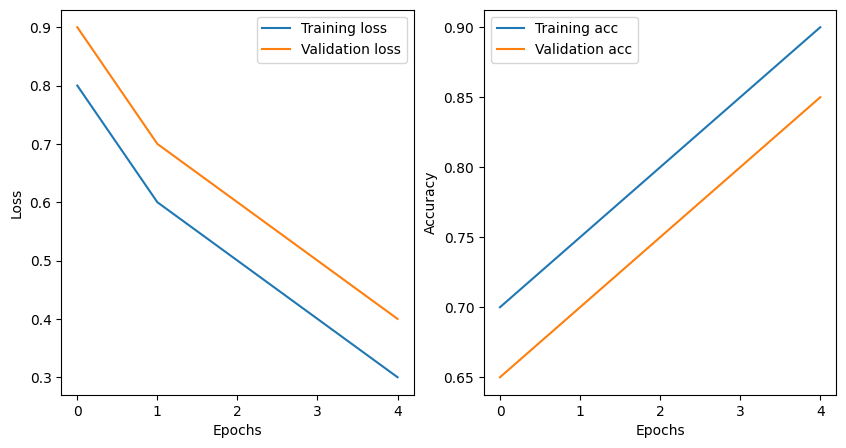

In [ ]:
import matplotlib.pyplot as plt

# Assume we have training_loss and validation_loss lists
training_loss = [0.8, 0.6, 0.5, 0.4, 0.3]  # Replace with actual values
validation_loss = [0.9, 0.7, 0.6, 0.5, 0.4]  # Replace with actual values

plt.figure(figsize=(10, 5))

# Plotting Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training loss')
plt.plot(validation_loss, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Training and Validation Accuracy
training_acc = [0.7, 0.75, 0.8, 0.85, 0.9]  # Replace with actual values
validation_acc = [0.65, 0.7, 0.75, 0.8, 0.85]  # Replace with actual values

plt.subplot(1, 2, 2)
plt.plot(training_acc, label='Training acc')
plt.plot(validation_acc, label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:

torch.save(model.state_dict(), 'my_model.h5')
